# EXPLORATORY DATA ANALYSIS - RETAIL

**AUTHOR- RAHUL JANGRA**

**GRIP- The Sparks Foundation**

BUSINESS PROBLEM: As a business manager , from the given dataset , we need to find out the weak areas where we can work to increase the profit .

In [2]:
#import the important liabraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Loading/Reading  the data 

In [4]:
#import the csv file of data

df= pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 13)

In [6]:
#to check the data types of each attributes and to check the null or missing values in the data set.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**As per the result of above query there is no null values in the dataset , so we can move forward to get the more details about the dataset.**

In [9]:
#for satistical functions
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# To know about the total sales and the profit generated by the retail store.

print('Sales:',df['Sales'].sum())
print('Profit:',df['Profit'].sum())


Sales: 2297200.8603
Profit: 286397.0217


In [11]:
# To check weather there is any duplicate row in the dataset

df.duplicated().sum()

17

In [12]:
df[df.duplicated()].shape

(17, 13)

In [13]:
# there are 17 duplicate rows , so we need to drop them

df= df.drop_duplicates()

In [14]:
#After dropping the duplicates
df.shape

(9977, 13)

# Regional Analysis

**To know the highest transactions made in which region**

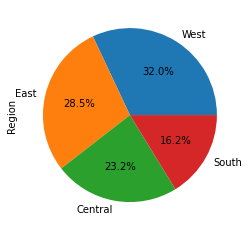

In [15]:
df.Region.value_counts().plot.pie(autopct='%.1f%%')
plt.show()

**From above pie chart , we can see maximum tranactions are in west region .**

**Now, to get the information about the sales and profit in each region:**

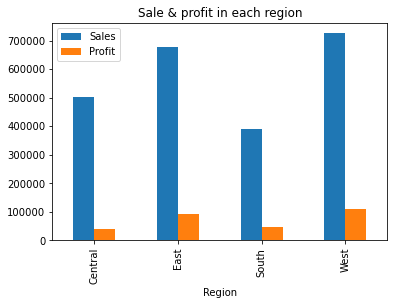

In [16]:
df.groupby('Region')['Sales','Profit'].sum().plot.bar()
plt.title('Sale & profit in each region')
plt.legend()
plt.show()

**From above graphical representation , we can see that west region made the highest sales and profit, whereas south region has least sales and profit.**

# Customer Analysis

**To check the sales and profit in each segment.**

In [17]:
plt.bar?

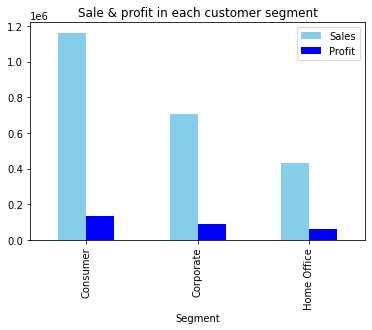

In [18]:
df.groupby('Segment')['Sales','Profit'].sum().plot.bar(color=['skyblue','blue'])
plt.title('Sale & profit in each customer segment')
plt.legend()
plt.show()

**From above graph , we can see that there are maximum sales and profit in consumer segment followed by corporate & home office.**

In [19]:
sns.countplot?

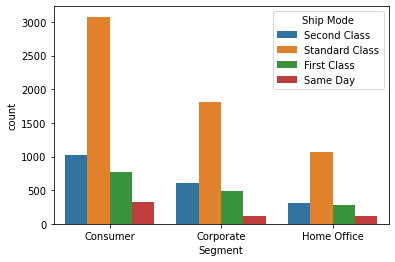

In [20]:
# To know the ship mode of transactions in each segment

sns.countplot(x='Segment', hue='Ship Mode', data=df)
plt.show()

**From above graph, we can see that highest transactions shipped in standard class .**

# Product Analysis

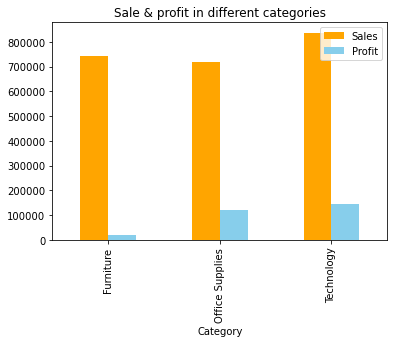

In [21]:
df.groupby('Category')['Sales','Profit'].sum().plot.bar(color=['orange','skyblue'])
plt.title('Sale & profit in different categories')
plt.legend(loc=1)
plt.show()

**From above, in furniture category there is a less profit as compare to other categories.**

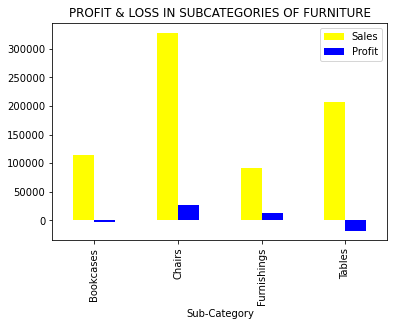

In [22]:
df[df['Category']=='Furniture'].groupby('Sub-Category')['Sales','Profit'].sum().plot.bar(color=['yellow','blue'])
plt.title('PROFIT & LOSS IN SUBCATEGORIES OF FURNITURE')
plt.legend(loc=1)  #loc=1 to get the lebel on right hand side.
plt.show()

**from above , we can see that in tables and bookcases subcategory there is a high loss which is effecting the whole category.**

**To check, what is causing the loss in these sub categories.**

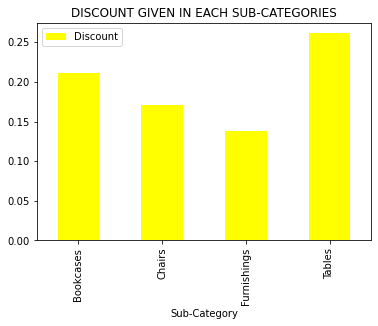

In [23]:
df[df['Category']=='Furniture'].groupby('Sub-Category')['Discount'].mean().plot.bar(color=['yellow'])
plt.title('DISCOUNT GIVEN IN EACH SUB-CATEGORIES')
plt.legend(loc=0)
plt.show()

**from above, we can conclude that in tables and bookcases , high discount is there as compare to others, so it might be an cause for the loss in the category**

**Now, we'll check whether discount is effecting the profit or not.**

In [24]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


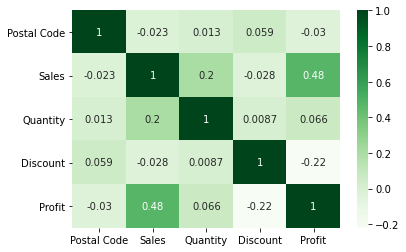

In [25]:
sns.heatmap(df.corr(),annot= True, cmap= 'Greens')
plt.show()

**From above, we can see there is a Positive correlation between sales and profit whereas negative correlation between Discount & Profit.**


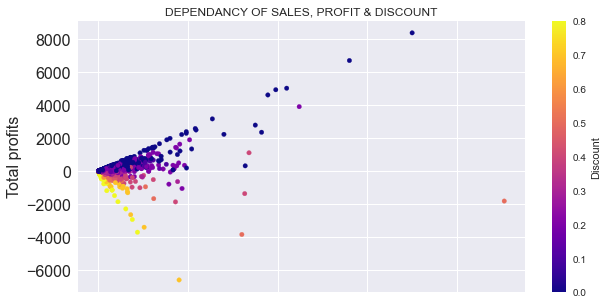

In [26]:
plt.style.use('seaborn')
df.plot(kind='scatter', figsize= (10,5), x='Sales', y='Profit', c='Discount', s= 20, fontsize= 16, colormap= 'plasma')
plt.ylabel('Total profits', fontsize= 16)
plt.title('DEPENDANCY OF SALES, PROFIT & DISCOUNT')
plt.show()

**From above we can observe , less discount cause to more profit, and vice- versa.**

# Top Products

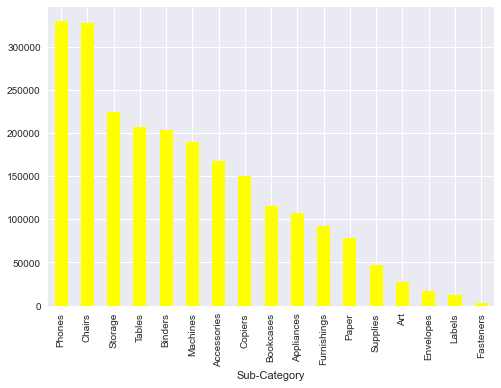

In [27]:
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar(color= 'yellow')
plt.show()

**From above , we conclude that Phones. Chairs, Storage are the highest sold items , whereas Fasteners, Labels and Envelopes are the least sold items.**

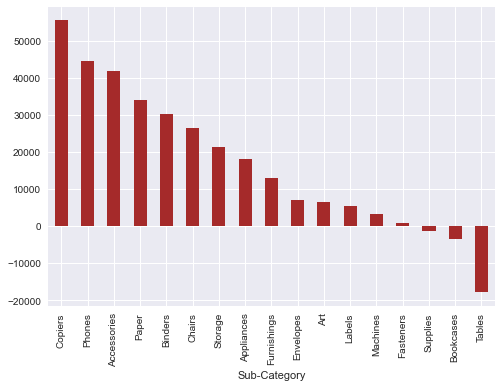

In [28]:
df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).plot.bar(color= 'brown')
plt.show()

**From above, we can see that there is highest profit in copies followed by phones and accessories .whereas tables and bookcases are in loss.**

# Observations:

* **Highest transactions** are in **west region**.
* **Highest profit** is also in **west region**.
* **Highest sales & profit** are there in **consumer segment**.
* **Highest transactions** were shipped in **standard class** in all segments.
* **Least profit** are there in **furniture** category irrespective of good no. of sales.
* Under Furniture , **tables and bookcases** incurring the **loss** which is effecting the profit of whole category.
* **High discount** offered in **tables and bookcases** subcategory , which might be the reason of loss here.
* **Positive correlation** between Sales & Profit and **Negative correlation** between Discount and Profit.
* **Less discount** more **profit** , whereas**more discount less profit**.



# **Conclusion:**

**We conclude, "furniture category" is the weak area as compare to others. And, under furniture category, "Tables and bookcases" incurring the loss because of the  more discount offered in the same . Therefore , We can "decrease the discount" to avoid the loss in these categories.**